# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [2]:
import os 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\janvi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [31]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ceux", "quelques", "rue", "mois", "leurs", "toute",
       "générale", "jour", "jours", "parce", "etc", "seule","suite", "liste", "alors", 
       "heures", "déjà", "chaque", "avant", "seul", "pris", "faits", "mis", "page", 
       "premier", "vie", "réponse", "nombre", "compte", "point"]
sw = set(sw)

In [32]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

227 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'alors', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avant', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'ceux', 'chaque', 'comme', 'compte', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'déjà', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'etc', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faits', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'générale', 'het', 'heures', 'il', 'ils', 'j', 'je', 'jour', 'jours', 'jusqu', 'l', 'la'

## Tokeniser

In [33]:
# Récupération du contenu du fichier
path = "../data/camille_crise_economique_des_annees_1930/KB_JB421_1930-01-26_01-00002.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [34]:
# Lister les Fichiers
data_path = "../data/camille_crise_economique_des_annees_1930/"
files = os.listdir(data_path)

In [35]:
#Tokenization de tous les documents 
words = []
for f in sorted(files)[:3]:
    text = open(os.path.join(data_path, f), 'r', encoding="utf-8").read()
    words += nltk.wordpunct_tokenize(text)
    print(f"{len(words)} words found")

5403 words found
11184 words found
16236 words found


In [36]:
words[:10]

['Samedi', '22', 'Mars', '1930', '.', '«', 'LE', 'DRAPEAU', 'ROUGE', '»']

## Calculer la taille du vocabulaire

In [37]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

6064 words kept (3119 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [38]:
fdist = nltk.FreqDist(kept)
fdist.most_common(100)

[('pays', 43),
 ('crise', 36),
 ('travailleurs', 36),
 ('ouvriers', 35),
 ('social', 34),
 ('parti', 31),
 ('fascistes', 26),
 ('commune', 26),
 ('presse', 24),
 ('guerre', 24),
 ('travail', 23),
 ('révolutionnaire', 22),
 ('masses', 22),
 ('lutte', 22),
 ('communiste', 22),
 ('grève', 20),
 ('mineurs', 18),
 ('gouvernement', 18),
 ('soviétique', 18),
 ('prix', 17),
 ('millions', 16),
 ('bourgeoisie', 16),
 ('réformistes', 16),
 ('mars', 15),
 ('fasciste', 15),
 ('économique', 15),
 ('bruxelles', 14),
 ('capitaliste', 14),
 ('chômage', 14),
 ('classe', 14),
 ('ouvrière', 14),
 ('politique', 13),
 ('prolétariat', 13),
 ('situation', 13),
 ('patrons', 13),
 ('général', 12),
 ('révolutionnaires', 12),
 ('démocratie', 12),
 ('février', 12),
 ('kolkhozes', 12),
 ('drapeau', 11),
 ('rouge', 11),
 ('amis', 11),
 ('développement', 11),
 ('mouvement', 11),
 ('production', 11),
 ('salaires', 11),
 ('nouvelle', 11),
 ('internationale', 11),
 ('socialiste', 10),
 ('grande', 10),
 ('mondial', 10),


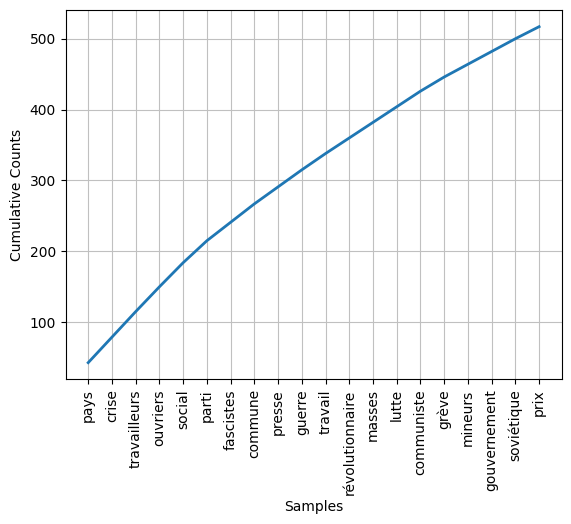

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [39]:
# Plot: les n mots les plus fréquents
n = 20
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [40]:
fdist.hapaxes()[:30]

['empêchent',
 'évidemment',
 'homme',
 'stoc',
 'rugir',
 'mugir',
 'ménagerie',
 'employé',
 'talents',
 'dénoncer',
 'acquemottè',
 'propos',
 'parade',
 'polonais',
 'collège',
 'tombes',
 'catholique',
 'empêché',
 'rené',
 'insomnie',
 'guérir',
 'pondu',
 'reconnaissons',
 'knock',
 'out',
 'bière',
 'vocabulaire',
 'riche',
 'voyoucratic',
 'prêcheurs']

## Trouver les mots les plus longs du corpus

In [41]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['illllllllllllllllllllllllllllllllillllllllllllilllllllllllll',
 'illllllllllllllllllllllllllillllllllllllllllilllllllllllllli',
 'iiilllillllllllllillllllllllllllllllllllllllllllllllllllllll',
 'ïïlllllllllllllllllllllllllillllllllllllllllllllllllllllllr',
 'ullllllllllllllllllllllilllllllllllllllllllllllllllllllllh',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiiihillilllllllllllllll',
 'iiiiiiiiiiiiiiiiiiiiiiiiiiimiiiiiiiiiiiiiiiiiiiiiiiiibnn',
 'iiiiimiiiiiiiiiiiiiimiiiiiiiiuiiiiiiiiimmiiiiiimi',
 'iiiiuuuiiiiiiiiiiiiiiiiiiiiiiiiiiiiiihi',
 'mieffiwmtmvmcsea',
 'gouvernementales',
 'révolutionnaires',
 'assujettissement',
 'interpénétration',
 'antiimpérialiste',
 'particulièrement',
 'collectivisation',
 'caractéristique',
 'intensification',
 'démagogiquement',
 'impitoyablement',
 'idéologiquement',
 'rationalisation',
 'gouvernementale',
 'supplémentaires',
 'reconstitueront',
 'administrateurs',
 'internationales',
 'grandiloquentes',
 'administrations']